In [28]:
from keras.preprocessing.text import Tokenizer

tok = Tokenizer()
text="Regret for wasted time is more wasted time"
tok.fit_on_texts(text)
# [text] : 단어 단위 토큰화
# text :   문자 단위 토큰화

In [20]:
print(tok.word_index)

{'e': 1, 't': 2, 'r': 3, 's': 4, 'i': 5, 'm': 6, 'o': 7, 'w': 8, 'a': 9, 'd': 10, 'g': 11, 'f': 12}


[[3], [1], [11], [3], [1], [2], [], [12], [7], [3], [], [8], [9], [4], [2], [1], [10], [], [], [7], [], [3], [], [5], [4], [], [6], [7], [3], [1], [], [8], [9], [4], [2], [1], [10], [], [], [7], [], [3]]


In [32]:
tok = Tokenizer()
text="Regret for wasted time is more wasted time"
tok.fit_on_texts([text]) # 사전을 만듬
tok.word_index

{'wasted': 1, 'time': 2, 'regret': 3, 'for': 4, 'is': 5, 'more': 6}

In [36]:
test="Regret for wasted hour is more wasted hour"
print(tok.texts_to_sequences([text]))
seq=tok.texts_to_sequences([test])[0] # 사전에 test에 저장된 단어가 있는지 확인, 있으면 해당 index를 return 해줌


[[3, 4, 1, 2, 5, 6, 1, 2]]


In [43]:
from keras.preprocessing.sequence import pad_sequences
# 샘플의 길이를 동일하게 해주는 함수
pad_sequences([[1,2,3],[2,3,4,5],[6,7]], maxlen=4, padding='pre') # 필수 작업 반드시 해야함

array([[0, 1, 2, 3],
       [2, 3, 4, 5],
       [0, 0, 6, 7]])

In [ ]:
# 워드 임베딩 : 문장 내의 단어들을 밀집벡터로 만드는 작업 (Embedding)
# 원핫벡터(고차원, 희소벡터, 기억장소낭비) => 메모리 낭비가 심함
# 밀집벡터(저차원, 실수값)
# ex) 원핫벡터 : 00100........00000 (tiger)
# ex) 밀집벡터 : [0.1, -1.5, 1.9, 2.4] (tiger)
# ex) text = [[0,1,2,3],[3,4,1,5]] # 문장 2개, 단어 8개
# Embedding(6, 2, 4)
# input_dim, output_dim, input_length(4개씩 들어가므로 4 => 이래서 padding 해줘야함)
# 6:단어 개수, 2:벡터 크기, 4:시퀀스 길이
# ex) 결과 : 0 -> [1.3, 1.5], 1 -> [2.5, 4.1]


In [50]:
# functional API
from keras.layers import Input, Dense, LSTM
from keras.models import Model

In [48]:
inp=Input(shape=(10,)) # 10개 입력 입력층
h1=Dense(32, activation='relu')(inp) # 앞에 입력되는 부분을 뒤에 (inp ) 로함 => 이 inp와 32가 연결됨
h2=Dense(16, activation='relu')(h1)
outp=Dense(1, activation='sigmoid')(h2)
model=Model(inputs=inp, outputs=outp)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xdata, ydata)

In [49]:
# rnn 구조를 함수형 api로 표현

In [54]:
inp=Input(shape=(50, 1))
h1=LSTM(10)(inp)
h2=Dense(10, activation='relu')(h1)
outp=Dense(1, activation='sigmoid')(h2)
model=Model(inputs=inp, outputs=outp)

In [55]:
# MLP로 텍스트 분류
from keras.preprocessing.text import Tokenizer
import numpy as np

In [56]:
texts=['먹고 싶은 사과', '먹고 싶은 바나나','길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [58]:
# 토큰화
tok=Tokenizer()
tok.fit_on_texts(texts)
print(tok.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [61]:
tok.texts_to_matrix(texts, mode='count')
# DTM

array([[0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [60]:
tok.texts_to_matrix(texts, mode='tfidf')
# TF-IDF matrix

array([[0.        , 0.        , 0.84729786, 0.84729786, 1.09861229,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.84729786, 0.84729786, 0.84729786, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.43459998, 0.        , 0.        , 0.        ,
        1.09861229, 1.09861229, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.09861229, 1.09861229, 1.09861229]])

In [62]:
tok.texts_to_matrix(texts, mode='binary') # 해당 단어가 있는지 없는지만 검사함

array([[0., 0., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [64]:
tok.texts_to_matrix(texts, mode='freq')
# 문장 단위로 몇번 등장했느지

array([[0.        , 0.        , 0.33333333, 0.33333333, 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.25      , 0.25      , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.33333333, 0.33333333, 0.33333333]])

In [68]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [69]:
newsData=fetch_20newsgroups(subset='train') # test ,all(18000) 지정 가능

In [71]:
print(newsData.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [72]:
len(newsData.data) # 11314

11314

In [73]:
print(newsData.target)
print(newsData.target_names)

[7 4 4 ... 3 1 8]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [78]:
df=pd.DataFrame(newsData.data, columns=['email'])
df['target']=newsData.target

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
email     11314 non-null object
target    11314 non-null int32
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


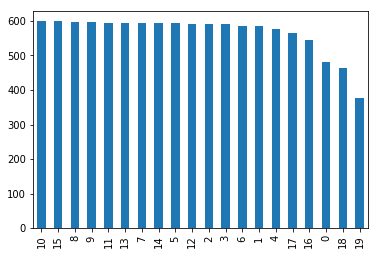

In [85]:
df['email'].nunique()
df['target'].nunique()
# 주제별 샘플의 개수 확인
df['target'].value_counts().plot(kind='bar')

In [86]:
df.groupby('target').size()

target
0     480
1     584
2     591
3     590
4     578
5     593
6     585
7     594
8     598
9     597
10    600
11    595
12    591
13    594
14    593
15    599
16    546
17    564
18    465
19    377
dtype: int64

In [87]:
newsDataTest=fetch_20newsgroups(subset='test', shuffle=True)

In [88]:
trainEmail=df['email']
trainLabel=df['target']

In [ ]:
newsData